In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [11]:
train='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
size=224
from tensorflow.keras.applications.mobilenet_v2 import  preprocess_input

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)


Found 63282 images belonging to 38 classes.


In [12]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

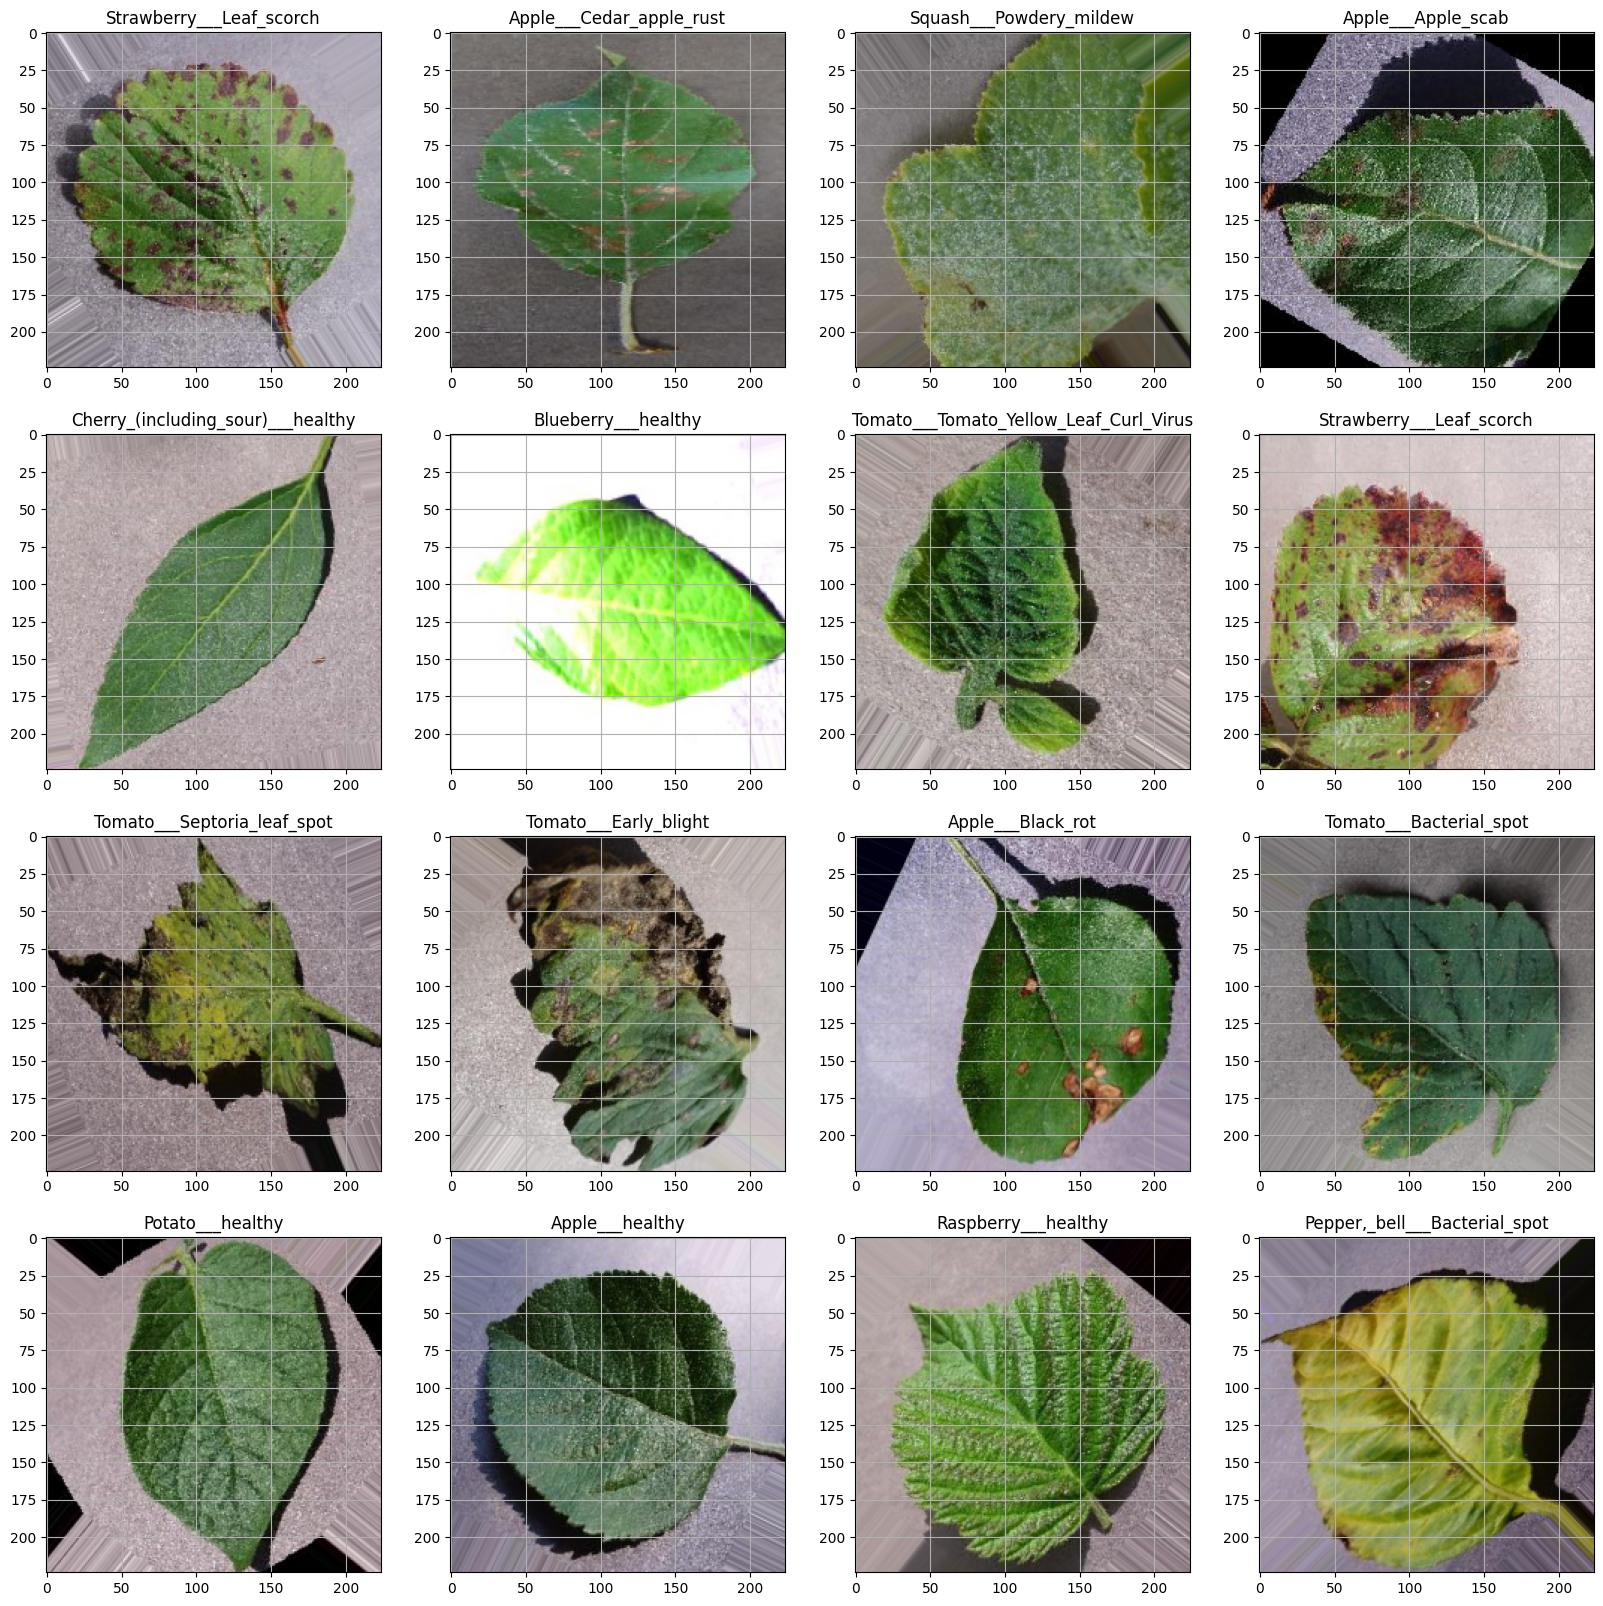

In [13]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse 
        plt.grid(None)
    # show the plot
    plt.show()
    break

In [14]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)


Found 7013 images belonging to 38 classes.


In [15]:
test='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)


Found 17572 images belonging to 38 classes.


In [16]:
# Creating the model using the Sequential API
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, 
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))
tf.keras.layers.BatchNormalization()
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, 
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, 
                              padding="same", activation="relu", name="Conv3"))
tf.keras.layers.BatchNormalization()
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                              padding="same", activation="relu", name="Conv4"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
tf.keras.layers.Dropout(0.5)
model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
tf.keras.layers.Dropout(0.5)
model.add(keras.layers.Dense(38, activation="softmax", name="Output"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [18]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy","precision","recall"])

In [19]:
# Training the model
history = model.fit(train_generator,
                    epochs          = 30,
                    batch_size=None,
                    validation_data = valid_generator,
                    callbacks = callbacks
                    )


Epoch 1/30


2024-10-29 03:18:13.997239: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,3,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[164,3,224,224]{3,2,1,0}, f32[164,32,224,224]{3,2,1,0}), window={size=7x7 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-29 03:18:14.851003: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.853882236s
Trying algorithm eng0{} for conv (f32[32,3,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[164,3,224,224]{3,2,1,0}, f32[164,32,224,224]{3,2,1,0}), window={size=7x7 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_con

320/386 ━━━━━━━━━━━━━━━━━━━━ 2:30 2s/step - accuracy: 0.2004 - loss: 2.9376 - precision: 0.6755 - recall: 0.0745

2024-10-29 03:30:48.351495: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,3,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[142,3,224,224]{3,2,1,0}, f32[142,32,224,224]{3,2,1,0}), window={size=7x7 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-29 03:30:48.952851: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.601469123s
Trying algorithm eng0{} for conv (f32[32,3,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[142,3,224,224]{3,2,1,0}, f32[142,32,224,224]{3,2,1,0}), window={size=7x7 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_con

386/386 ━━━━━━━━━━━━━━━━━━━━ 974s 2s/step - accuracy: 0.2340 - loss: 2.7983 - precision: 0.6899 - recall: 0.1012 - val_accuracy: 0.5836 - val_loss: 1.3781 - val_precision: 0.7003 - val_recall: 0.4885 - learning_rate: 0.0010
Epoch 2/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.7167 - loss: 0.9144 - precision: 0.8283 - recall: 0.6203 - val_accuracy: 0.7918 - val_loss: 0.6484 - val_precision: 0.8558 - val_recall: 0.7305 - learning_rate: 0.0010
Epoch 3/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 749s 2s/step - accuracy: 0.8207 - loss: 0.5678 - precision: 0.8759 - recall: 0.7703 - val_accuracy: 0.8223 - val_loss: 0.5649 - val_precision: 0.8715 - val_recall: 0.7803 - learning_rate: 0.0010
Epoch 4/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 746s 2s/step - accuracy: 0.8661 - loss: 0.4165 - precision: 0.9016 - recall: 0.8355 - val_accuracy: 0.8102 - val_loss: 0.5742 - val_precision: 0.8556 - val_recall: 0.7763 - learning_rate: 0.0010
Epoch 5/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.8899

In [25]:
# Evaluate the model
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9796 - loss: 0.0652 - precision: 0.9811 - recall: 0.9780
Loss     :  0.07994339615106583
Accuracy :  0.9741634130477905
Precision  :  0.9760164618492126
Recall :  0.9726837873458862
